In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the data
df = pd.read_csv('BTC-USD.csv')

# Set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2022-07-04,2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,20231.261719,21594638208
2022-07-05,2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990
2022-07-06,2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708
2022-07-07,2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520
2022-07-08,2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,21731.117188,49899834488
...,...,...,...,...,...,...,...
2023-06-30,2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197
2023-07-01,2023-07-01,30471.847656,30641.289063,30328.865234,30590.078125,30590.078125,9086606733
2023-07-02,2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042
2023-07-03,2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873


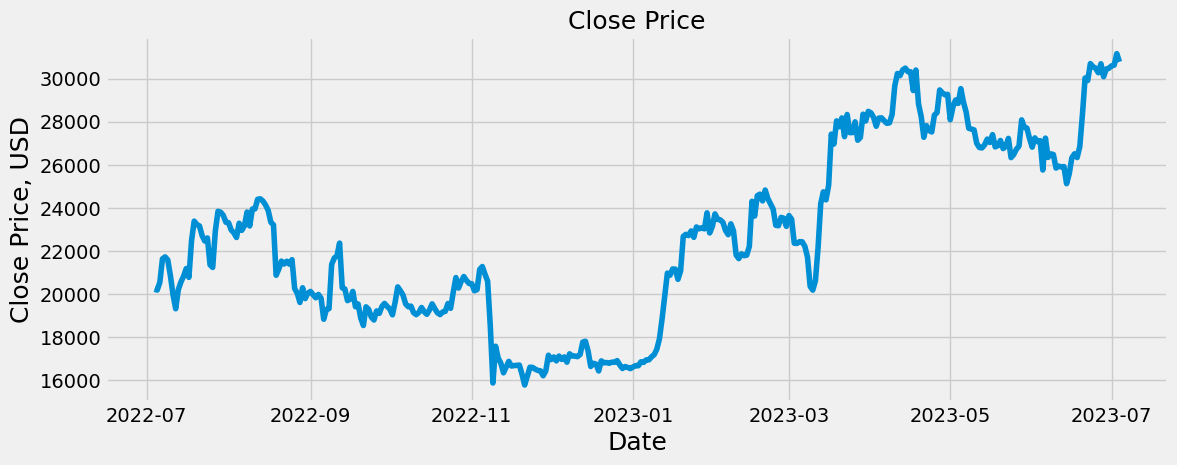

In [3]:
# Visualize the data
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price, USD', fontsize = 18)
plt.show()

In [4]:
# Calculate the three moving averages
# Calculate the short/fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust = False).mean()
# Calculate the long/slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust = False).mean()
# Calculate the Middle/medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust = False).mean()

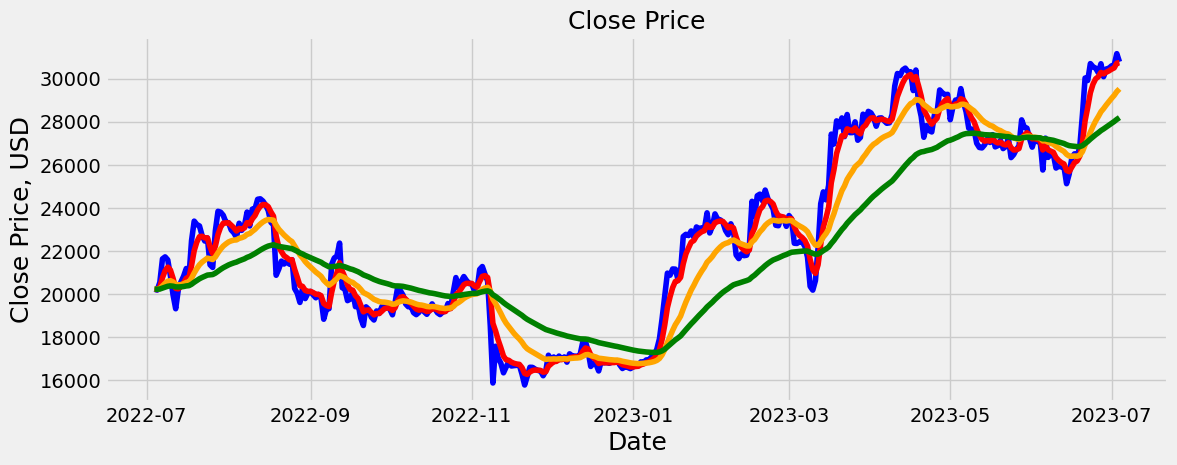

In [5]:
# Visualize the closing price and the exponential moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(df['Close'], label = 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/Fast', color = 'red')
plt.plot(MiddleEMA, label = 'Middle/Medium', color = 'orange')
plt.plot(LongEMA, label = 'Long/Slow', color = 'green')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price, USD', fontsize = 18)
plt.show()

In [6]:
# Add the exponential averages to the dataset
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

In [7]:
# Show the df
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2022-07-04,2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,20231.261719,21594638208,20231.261719,20231.261719,20231.261719
2022-07-05,2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990,20217.546224,20227.521129,20229.975891
2022-07-06,2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708,20327.779514,20256.677944,20239.921835
2022-07-07,2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520,20764.382306,20382.215212,20283.598899
2022-07-08,2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,21731.117188,49899834488,21086.627267,20504.842665,20328.833846
...,...,...,...,...,...,...,...,...,...,...
2023-06-30,2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197,30355.206156,28929.739241,27837.522809
2023-07-01,2023-07-01,30471.847656,30641.289063,30328.865234,30590.078125,30590.078125,9086606733,30433.496812,29080.679139,27923.540163
2023-07-02,2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042,30495.921052,29220.687357,28007.828580
2023-07-03,2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873,30716.093852,29396.664820,28106.222670


In [8]:
# Create the function to buy and sell the stock
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False
    
    for i in range(0, len(data)):
        # if Middle  line goes below the long line AND short goes below the Middle
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)

In [9]:
# Add the buy and sell signals to the dataset
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

In [10]:
# Show new  dataframe table
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long,Buy,Sell
2022-07-04,2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,20231.261719,21594638208,20231.261719,20231.261719,20231.261719,NaN,NaN
2022-07-05,2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990,20217.546224,20227.521129,20229.975891,20190.115234,NaN
2022-07-06,2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708,20327.779514,20256.677944,20239.921835,NaN,20548.246094
2022-07-07,2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520,20764.382306,20382.215212,20283.598899,21637.587891,NaN
2022-07-08,2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,21731.117188,49899834488,21086.627267,20504.842665,20328.833846,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,2023-06-30,30441.353516,31256.863281,29600.275391,30477.251953,30477.251953,26387306197,30355.206156,28929.739241,27837.522809,NaN,NaN
2023-07-01,2023-07-01,30471.847656,30641.289063,30328.865234,30590.078125,30590.078125,9086606733,30433.496812,29080.679139,27923.540163,NaN,NaN
2023-07-02,2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042,30495.921052,29220.687357,28007.828580,NaN,NaN
2023-07-03,2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873,30716.093852,29396.664820,28106.222670,NaN,NaN


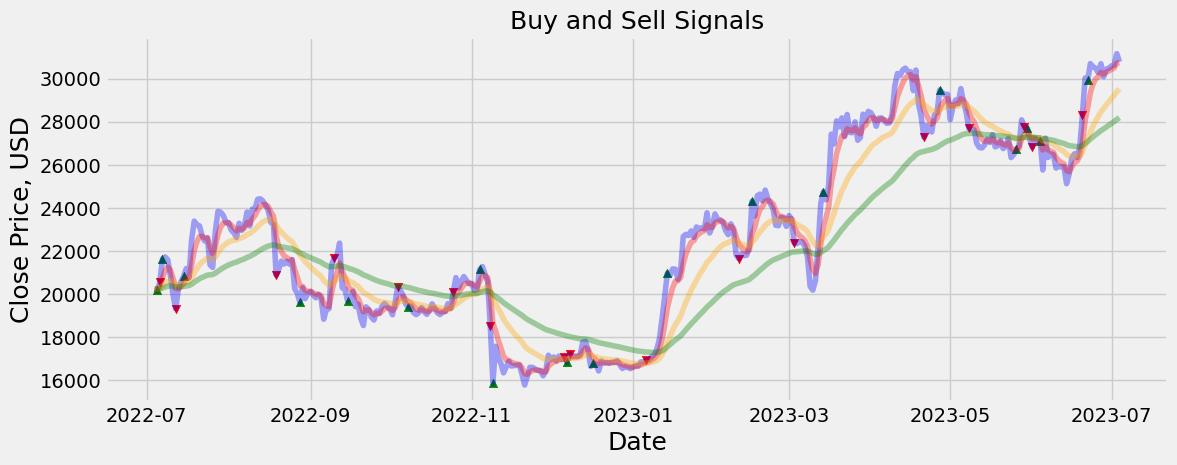

In [11]:
# Visualize the Buy and Sell signals
plt.figure(figsize=(12.2, 4.5))
plt.title('Buy and Sell Signals', fontsize = 18)
plt.plot(df['Close'], label = 'Close Price', color = 'blue', alpha = .35)
plt.plot(ShortEMA, label = 'Short/Fast', color = 'red', alpha = .35)
plt.plot(MiddleEMA, label = 'Middle/Medium', color = 'orange', alpha = .35)
plt.plot(LongEMA, label = 'Long/Slow', color = 'green', alpha = .35)
plt.scatter(df.index, df['Buy'], label = 'Buy', color = 'green', marker ='^', alpha = 1)
plt.scatter(df.index, df['Sell'], label = 'Sell', color = 'red', marker ='v', alpha = 1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price, USD', fontsize = 18)
plt.show()

In [12]:
import mplfinance as mpf

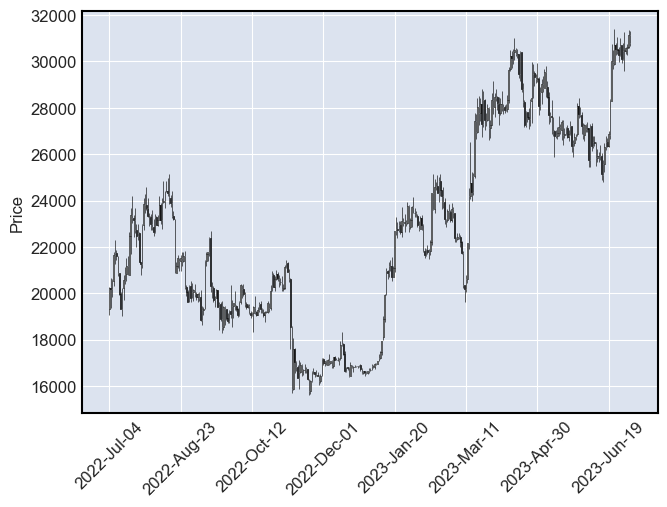

In [15]:
mpf.plot(df, type="candle")